In [43]:
import numpy as np
import os
root_path = 'C:/code_log/nips_23/ohio/ohio_gatv2_exp_pred_6_all_features_seed_10'

epoch_variable_importance = np.load(os.path.join(root_path, 'epoch_variable_importance.npy'), allow_pickle=True)[()]

print(epoch_variable_importance.keys())
print(epoch_variable_importance['glucose_level'][0], len(epoch_variable_importance['glucose_level'][0]))
print(epoch_variable_importance['glucose_level'][1], len(epoch_variable_importance['glucose_level'][1]))

dict_keys(['glucose_level', 'meal', 'bolus', 'basal', 'finger_stick', 'basis_skin_temperature', 'basis_gsr', 'basis_sleep', 'acceleration', 'exercise', 'sleep', 'work', 'basis_steps', 'basis_heart_rate', 'basis_air_temperature', 'timestamp'])
[0, 500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500, 10500, 11500, 12500, 13500, 14500, 15080, 15240, 15400, 15560, 15720, 15880, 16040, 16200, 16360, 16520, 16680, 16840, 17000, 17160, 17320] 31
[-0.4682826   0.19252898  0.41770688  0.454377    0.50116384  0.53796285
  0.5620443   0.5712258   0.5695513   0.5810443   0.6046824   0.58745176
  0.56823015  0.5591459   0.56719846  0.5499443   0.5503408   0.55065817
  0.5512115   0.55166465  0.5522483   0.55336773  0.55380636  0.55440634
  0.5550601   0.555445    0.55614734  0.5567372   0.55728054  0.55793995
  0.55846757] 31


In [44]:
pid2metrics = np.load(os.path.join(root_path, 'pid2metrics.npy'), allow_pickle=True)[()]
print(pid2metrics.keys())
print(pid2metrics['rmse'])

dict_keys(['rmse', 'mape', 'mae', 'grmse', 'time_lag'])
[18.47767735801432, 18.82868337475972, 16.653599512087002, 23.419911369071325, 16.784008516874962, 20.319926526995612, 22.402092754151898, 15.944801961602614, 17.45643031173658, 21.128361361179756, 22.949048204153534, 16.54963293676923]


In [45]:
train_all_variable_importance = np.load(os.path.join(root_path, 'train_all_variable_importance.npy'), allow_pickle=True)
print(train_all_variable_importance)


[['glucose_level' 'meal' 'finger_stick' 'bolus' 'sleep' 'exercise' 'work'
  'timestamp' 'basis_sleep' 'basis_gsr' 'basal' 'acceleration'
  'basis_heart_rate' 'basis_steps' 'basis_air_temperature'
  'basis_skin_temperature']
 ['0.55444497' '0.053199213' '0.033777874' '0.01365598' '0.012439631'
  '0.010999743' '0.00013899346' '-0.0100849755' '-0.021804344'
  '-0.047917847' '-0.052432567' '-0.05463081' '-0.08832842'
  '-0.106276855' '-0.11123964' '-0.13952103']]


In [21]:
import numpy as np
import os
root_dir = 'C:/code_log/nips_23/'

methods = ['gatv2_exp', 'gatv2_exp_layer_1', 'gat_exp', 'gat_exp_layer_1','att_f_lstm','att_t_lstm' , 'tgru', 'imv_tensor_lstm','imv_full_lstm', 'retain',  'xgboost', 'linear_regression']
methods = methods[::-1]
method2name = {
    'gatv2_exp': 'GATv2+GRU (L=2)',
    'gatv2_exp_layer_1' :  'GATv2+GRU (L=1)',
    'gat_exp': 'GAT+GRU (L=2)', 
    'gat_exp_layer_1': 'GAT+GRU (L=1)',
    'gat_simplev2': 'Gate+GRU (L=2)',
    'gat_simplev2_layer_1': 'Gate+GRU (L=1)',
    'xgboost': 'XGBoost',
    'linear_regression':'LR',
    'imv_tensor_lstm': 'IMV-TENSOR',
    'imv_full_lstm': 'IMV-FULL',
    'retain': 'RETAIN',
    'tgru' : 'TGRU',
    'att_t_lstm': 'ATT-T-LSTM',
    'att_f_lstm':'ATT-F-LSTM',

}

metric2name = {
    'rmse' : 'RMSE (mg/dL)',
    'mape' : 'MAPE (%)',
    'mae' : 'MAE (mg/dL)',
    'grmse' : 'gRMSE (mg/dL)',
    'time_lag' : 'Time lag (min)'
}



datasets = ['ohio', 'arises', 'shanghai_t1dm', 'shanghai_t2dm']
# datasets = ['ohio', 'shanghai_t1dm',]

dataset2pred = {
    'ohio':6, 'arises':6, 'shanghai_t1dm':2, 'shanghai_t2dm':2,
}
save_dict = {}

for dataset in datasets:
    for method in methods:
        for seed in [1, 10, 20, 80, 100]:
            res_path = os.path.join(root_dir, dataset, f'{dataset}_{method}_pred_{dataset2pred[dataset]}_all_features')
            if (seed==1 and not os.path.exists(res_path)) or seed > 1:
                res_path = res_path + f'_seed_{seed}'

            if not os.path.exists(res_path):
                continue
            try:
                
                metrics2values = np.load(os.path.join(res_path, 'pid2metrics.npy'), allow_pickle=True)[()]
                print(os.path.join(res_path, 'pid2metrics.npy'))
            except:
                 continue

            for key in metrics2values:
                if (dataset, method, key, 'mean') not in save_dict:
                    save_dict[(dataset, method, key, 'mean')] = []
                    save_dict[(dataset, method, key, 'std')] = []
                save_dict[(dataset, method, key, 'mean')].append(np.mean(metrics2values[key]))
                save_dict[(dataset, method, key, 'std')].append(np.std(metrics2values[key]))
                print(dataset, method, seed, key, np.mean(metrics2values[key]), np.std(metrics2values[key]))

import xlwt
book = xlwt.Workbook(encoding='utf-8', style_compression=0)
dataset2sheet = {}
for dataset in datasets:
    sheet = book.add_sheet(dataset, cell_overwrite_ok=True)
    dataset2sheet[dataset] = sheet
    sheet.write(0, 0, 'Method')
    for j, k in enumerate(metric2name.keys()):
        sheet.write(0, j + 1, metric2name[k])

    for i, method in enumerate(methods):
        sheet.write(i+1, 0, method2name[method])
        
    for i, method in enumerate(methods):
        for j, metric in enumerate(metric2name.keys()):
            temp_mean = np.mean(save_dict[(dataset, method, metric, 'mean')])
            temp_std = np.mean(save_dict[(dataset, method, metric, 'std')])
            temp_seed_std = np.std(save_dict[(dataset, method, metric, 'mean')])

            sheet.write(i + 1 , j + 1, f'{temp_mean:.2f}' + r'$\pm$' + f'{temp_seed_std:.2f}({temp_std:.2f})' )

if not os.path.exists('./results'):
    os.makedirs('./results')
book.save('./results/compare.xls')


# C:\code_log\nips_23\shanghai_t1dm\shanghai_t1dm_gatv2_exp_pred_2_all_features


C:/code_log/nips_23/ohio\ohio_linear_regression_pred_6_all_features_seed_1\pid2metrics.npy
ohio linear_regression 1 rmse 22.300219724811413 2.75813612605428
ohio linear_regression 1 mape 10.949498414993286 2.1435562722501458
ohio linear_regression 1 mae 15.981479 1.9426697
ohio linear_regression 1 grmse 27.79392898031521 3.6807877345363367
ohio linear_regression 1 time_lag -8.54861111111111 6.238550469450138
C:/code_log/nips_23/ohio\ohio_linear_regression_pred_6_all_features_seed_10\pid2metrics.npy
ohio linear_regression 10 rmse 22.300219724811413 2.75813612605428
ohio linear_regression 10 mape 10.949498414993286 2.1435562722501458
ohio linear_regression 10 mae 15.981479 1.9426697
ohio linear_regression 10 grmse 27.79392898031521 3.6807877345363367
ohio linear_regression 10 time_lag -8.54861111111111 6.238550469450138
C:/code_log/nips_23/ohio\ohio_linear_regression_pred_6_all_features_seed_20\pid2metrics.npy
ohio linear_regression 20 rmse 22.300219724811413 2.75813612605428
ohio linear

KeyError: ('arises', 'att_t_lstm', 'rmse', 'mean')

In [7]:
import numpy as np
import os
from scipy import stats
from scipy.stats import wilcoxon, ttest_rel
root_dir = 'C:/code_log/nips_23/'

methods = ['gatv2_exp', 'gatv2_exp_layer_1', 'gat_exp', 'gat_exp_layer_1','att_f_lstm','att_t_lstm' , 'tgru', 'imv_tensor_lstm','imv_full_lstm', 'retain',  'xgboost', 'linear_regression']
methods = methods[::-1]
our_method = 'gatv2_exp_layer_1'
method2name = {
    'gatv2_exp': 'GATv2+GRU (L=2)',
    'gatv2_exp_layer_1' :  'GATv2+GRU (L=1)',
    'gat_exp': 'GAT+GRU (L=2)', 
    'gat_exp_layer_1': 'GAT+GRU (L=1)',
    'gat_simplev2': 'Gate+GRU (L=2)',
    'gat_simplev2_layer_1': 'Gate+GRU (L=1)',
    'xgboost': 'XGBoost',
    'linear_regression':'LR',
    'imv_tensor_lstm': 'IMV-TENSOR',
    'imv_full_lstm': 'IMV-FULL',
    'retain': 'RETAIN',
    'tgru' : 'TGRU',
    'att_t_lstm': 'ATT-T-LSTM',
    'att_f_lstm':'ATT-F-LSTM',
}

metric2name = {
    'rmse' : 'RMSE (mg/dL)',
    'mape' : 'MAPE (%)',
    'mae' : 'MAE (mg/dL)',
    'grmse' : 'gRMSE (mg/dL)',
    'time_lag' : 'Time lag (min)'
}



datasets = ['ohio', 'arises', 'shanghai_t1dm', 'shanghai_t2dm']
# datasets = ['ohio', 'shanghai_t1dm',]

dataset2num_people = {
    'ohio': 12,
    'arises': 12,
    'shanghai_t1dm': 12,
    'shanghai_t2dm': 100,
}

dataset2pred = {
    'ohio':6, 'arises':6, 'shanghai_t1dm':2, 'shanghai_t2dm':2,
}
save_dict = {}

for dataset in datasets:
    for method in methods:
        for seed in [1, 10, 20, 80, 100]:
            res_path = os.path.join(root_dir, dataset, f'{dataset}_{method}_pred_{dataset2pred[dataset]}_all_features')
            if (seed==1 and not os.path.exists(res_path)) or seed > 1:
                res_path = res_path + f'_seed_{seed}'

            if not os.path.exists(res_path):
                continue
            try:
                
                metrics2values = np.load(os.path.join(res_path, 'pid2metrics.npy'), allow_pickle=True)[()]
                # print(os.path.join(res_path, 'pid2metrics.npy'))
            except:
                 continue

            for key in metrics2values:
                if (dataset, method, key, 'mean') not in save_dict:
                    save_dict[(dataset, method, key, 'mean')] = []
                    save_dict[(dataset, method, key, 'std')] = []
                    save_dict[(dataset, method, key, 'origin')] = []
                save_dict[(dataset, method, key, 'mean')].append(np.mean(metrics2values[key]))
                save_dict[(dataset, method, key, 'std')].append(np.std(metrics2values[key]))
                save_dict[(dataset, method, key, 'origin')] += metrics2values[key]
                # print(dataset, method, seed, key, np.mean(metrics2values[key]), np.std(metrics2values[key]))

for dataset in datasets:
    num_people = dataset2num_people[dataset]
    for metric in metrics2values:
        for method in methods:
            
            if method == our_method:
                continue
            our_method_res = save_dict[(dataset, our_method, metric, 'origin')]
            baseline_res = save_dict[(dataset, method, metric, 'origin')]
            
            pval_of_norm = stats.shapiro(np.array(our_method_res)[:num_people]-np.array(baseline_res)[:num_people])[1]
            if pval_of_norm > 0.05:
                total_temp = len(our_method_res) // num_people
                temp = 0
                for i in range(0, len(our_method_res), num_people):
                    temp += ttest_rel(np.array(our_method_res)[i: i + num_people], np.array(baseline_res)[i: i + num_people])[1]
                save_dict[(dataset, method, metric, 'p_value')] = temp / total_temp
            else:
                try:
                    total_temp = len(our_method_res) // num_people
                    temp = 0
                    for i in range(0, len(our_method_res), num_people):
                        temp += wilcoxon(np.array(our_method_res)[i: i + num_people], np.array(baseline_res)[i: i + num_people])[1]
                    save_dict[(dataset, method, metric, 'p_value')] = temp / total_temp
                    print(dataset, method, metric, 'p_value', temp / total_temp)
                    
                except:
                    save_dict[(dataset, method, metric, 'p_value')] = None
            # if ttest_rel(np.array(our_method_res), np.array(baseline_res))[1] > 0.05:
            #     print(dataset, metric, method, ttest_rel(np.array(our_method_res), np.array(baseline_res)))

import xlwt
book = xlwt.Workbook(encoding='utf-8', style_compression=0)
dataset2sheet = {}
for dataset in datasets:
    sheet = book.add_sheet(dataset, cell_overwrite_ok=True)
    dataset2sheet[dataset] = sheet
    sheet.write(0, 0, 'Method')
    for j, k in enumerate(metric2name.keys()):
        sheet.write(0, j + 1, metric2name[k])

    for i, method in enumerate(methods):
        sheet.write(i+1, 0, method2name[method])
        
    for i, method in enumerate(methods):
        for j, metric in enumerate(metric2name.keys()):
            temp_mean = np.mean(save_dict[(dataset, method, metric, 'mean')])
            temp_std = np.mean(save_dict[(dataset, method, metric, 'std')])
            # temp_seed_std = np.std(save_dict[(dataset, method, metric, 'mean')])
            
            # sheet.write(i + 1 , j + 1, f'{temp_mean:.2f}' + r'$\pm$' + f'{temp_seed_std:.2f}({temp_std:.2f})' )
            
            if method==our_method or save_dict[(dataset, method, metric, 'p_value')] is None:
                post = ''
            elif save_dict[(dataset, method, metric, 'p_value')] <= 0.005:
                post = r'$\ddagger$'
            elif save_dict[(dataset, method, metric, 'p_value')] <= 0.01:
                post = r'$\dagger$'
            elif save_dict[(dataset, method, metric, 'p_value')] <= 0.05:
                post = r'$\ast$'
            else:
                post = ''
                print(dataset, method, metric, save_dict[(dataset, method, metric, 'p_value')])
            sheet.write(i + 1 , j + 1, f'{temp_mean:.2f}' + r'$\pm$' + f'{temp_std:.2f}' + post )

if not os.path.exists('./results'):
    os.makedirs('./results')
book.save('./results/compare_more.xls')


# C:\code_log\nips_23\shanghai_t1dm\shanghai_t1dm_gatv2_exp_pred_2_all_features


ohio xgboost rmse p_value 0.00048828125
ohio imv_tensor_lstm rmse p_value 0.0006103515625
ohio gat_exp_layer_1 rmse p_value 0.6552734375
ohio xgboost grmse p_value 0.00048828125
ohio imv_tensor_lstm grmse p_value 0.0006103515625
ohio gat_exp_layer_1 grmse p_value 0.5260009765625
ohio linear_regression time_lag p_value 0.00742183330473793
ohio imv_full_lstm time_lag p_value 0.5290735749451383
ohio gat_exp_layer_1 time_lag p_value 0.49948979247268954
ohio gat_exp time_lag p_value 0.41255360752403447
ohio gatv2_exp time_lag p_value 0.41842180940874696
arises linear_regression rmse p_value 0.00048828125
arises xgboost rmse p_value 0.00048828125
arises att_f_lstm rmse p_value 0.0006103515625
arises gat_exp rmse p_value 0.2847900390625
arises gat_exp mape p_value 0.3548583984375
arises linear_regression mae p_value 0.00048828125
arises att_t_lstm mae p_value 0.00048828125
arises gat_exp mae p_value 0.516357421875
arises linear_regression grmse p_value 0.00048828125
arises xgboost grmse p_val

In [12]:
import numpy as np
import os
from scipy import stats
from scipy.stats import wilcoxon, ttest_rel
root_dir = 'C:/code_log/nips_23/'

methods = ['gatv2_exp', 'gatv2_exp_layer_1', 'gat_exp', 'gat_exp_layer_1','MNODE', 'LPSC', 'LP', 'NHiTS', 'NBEATS', 'att_f_lstm','att_t_lstm' , 'ETN-ODE', 'imv_tensor_lstm','imv_full_lstm', 'retain',  'xgboost', 'linear_regression']
methods = methods[::-1]
our_method = 'gatv2_exp_layer_1'
method2name = {
    'gatv2_exp': 'GATv2+GRU (L=2)',
    'gatv2_exp_layer_1' :  'GATv2+GRU (L=1)',
    'gat_exp': 'GAT+GRU (L=2)', 
    'gat_exp_layer_1': 'GAT+GRU (L=1)',
    'gat_simplev2': 'Gate+GRU (L=2)',
    'gat_simplev2_layer_1': 'Gate+GRU (L=1)',
    'xgboost': 'XGBoost',
    'linear_regression':'LR',
    'imv_tensor_lstm': 'IMV-TENSOR',
    'imv_full_lstm': 'IMV-FULL',
    'retain': 'RETAIN',
    'tgru' : 'TGRU',
    'att_t_lstm': 'ATT-T-LSTM',
    'att_f_lstm':'ATT-F-LSTM',
    'NHiTS':'NHiTS',
    'NBEATS':'N-BEATS',
    'ETN-ODE': 'ETN-ODE',
    'LP':'LP',
    'MNODE':'MNODE',
    'LPSC':'LPSC',
}

metric2name = {
    'rmse' : 'RMSE (mg/dL)',
    'mape' : 'MAPE (%)',
    'mae' : 'MAE (mg/dL)',
    'grmse' : 'gRMSE (mg/dL)',
    'time_lag' : 'Time lag (min)'
}



datasets = ['ohio', 'arises', 'shanghai_t1dm', 'shanghai_t2dm']
# datasets = ['shanghai_t1dm',]

dataset2num_people = {
    'ohio': 12,
    'arises': 12,
    'shanghai_t1dm': 12,
    'shanghai_t2dm': 100,
}

dataset2pred = {
    'ohio':6, 'arises':6, 'shanghai_t1dm':2, 'shanghai_t2dm':2,
}
save_dict = {}

for dataset in datasets:
    for method in methods:
        for seed in [1, 10, 20, 80, 100]:
            res_path = os.path.join(root_dir, dataset, f'{dataset}_{method}_pred_{dataset2pred[dataset]}_all_features')
            if (seed==1 and not os.path.exists(res_path)) or seed > 1:
                res_path = res_path + f'_seed_{seed}'

            if not os.path.exists(res_path):
                continue
            try:
                
                metrics2values = np.load(os.path.join(res_path, 'pid2metrics.npy'), allow_pickle=True)[()]
                # print(os.path.join(res_path, 'pid2metrics.npy'))
            except:
                 continue
            # print(dataset, method, seed, 'loaded')
            for key in metrics2values:
                if (dataset, method, key, 'mean') not in save_dict:
                    save_dict[(dataset, method, key, 'mean')] = []
                    save_dict[(dataset, method, key, 'std')] = []
                    save_dict[(dataset, method, key, 'origin')] = []
                save_dict[(dataset, method, key, 'mean')].append(np.mean(metrics2values[key]))
                save_dict[(dataset, method, key, 'std')].append(np.std(metrics2values[key]))
                save_dict[(dataset, method, key, 'origin')] += metrics2values[key]
                # print(dataset, method, seed, key, np.mean(metrics2values[key]), np.std(metrics2values[key]))

for dataset in datasets:
    num_people = dataset2num_people[dataset]
    for metric in metrics2values:
        for method in methods:
            
            # if method == our_method:
            #     continue
            # our_method_res = save_dict[(dataset, our_method, metric, 'origin')]
            # baseline_res = save_dict[(dataset, method, metric, 'origin')]
            
            # pval_of_norm = stats.shapiro(np.array(our_method_res)[:num_people]-np.array(baseline_res)[:num_people])[1]
            # if pval_of_norm > 0.05:
            #     total_temp = len(our_method_res) // num_people
            #     temp = 0

            #     for i in range(0, len(our_method_res), num_people):
            #         temp += ttest_rel(np.array(our_method_res)[i: i + num_people], np.array(baseline_res)[i: i + num_people])[1]
            #     save_dict[(dataset, method, metric, 'p_value')] = temp / total_temp

            # else:
            #     try:
            #         total_temp = len(our_method_res) // num_people
            #         temp = 0
            #         for i in range(0, len(our_method_res), num_people):
            #             temp += wilcoxon(np.array(our_method_res)[i: i + num_people], np.array(baseline_res)[i: i + num_people])[1]
            #         save_dict[(dataset, method, metric, 'p_value')] = temp / total_temp
            #         print(dataset, method, metric, 'p_value', temp / total_temp)
                    
            #     except:
            #         save_dict[(dataset, method, metric, 'p_value')] = None

            if method == our_method:
                continue
            our_method_res = save_dict[(dataset, our_method, metric, 'origin')]
            baseline_res = save_dict[(dataset, method, metric, 'origin')]
            
            try:
           
                temp = wilcoxon(np.array(our_method_res), np.array(baseline_res))[1]
                save_dict[(dataset, method, metric, 'p_value')] = temp
                print(dataset, method, metric, 'p_value', temp)
                
            except:
                save_dict[(dataset, method, metric, 'p_value')] = None

import xlwt
book = xlwt.Workbook(encoding='utf-8', style_compression=0)
dataset2sheet = {}
for dataset in datasets:
    sheet = book.add_sheet(dataset, cell_overwrite_ok=True)
    dataset2sheet[dataset] = sheet
    sheet.write(0, 0, 'Method')
    for j, k in enumerate(metric2name.keys()):
        sheet.write(0, j + 1, metric2name[k])

    for i, method in enumerate(methods):
        sheet.write(i+1, 0, method2name[method])
        
    for i, method in enumerate(methods):
        for j, metric in enumerate(metric2name.keys()):
            temp_mean = np.mean(save_dict[(dataset, method, metric, 'mean')])
            temp_std = np.mean(save_dict[(dataset, method, metric, 'std')])
            temp_seed_std = np.std(save_dict[(dataset, method, metric, 'mean')])
            
            # sheet.write(i + 1 , j + 1, f'{temp_mean:.2f}' + r'$\pm$' + f'{temp_seed_std:.2f}({temp_std:.2f})' )
            
            if method==our_method or save_dict[(dataset, method, metric, 'p_value')] is None:
                post = ''
            elif save_dict[(dataset, method, metric, 'p_value')] <= 0.005:
                post = r'$\ddagger$'
            elif save_dict[(dataset, method, metric, 'p_value')] <= 0.01:
                post = r'$\dagger$'
            elif save_dict[(dataset, method, metric, 'p_value')] <= 0.05:
                post = r'$\ast$'
            else:
                post = ''
                # print(dataset, method, metric, save_dict[(dataset, method, metric, 'p_value')])
                
            if metric == 'time_lag':
                temp_mean = abs(temp_mean)
            sheet.write(i + 1 , j + 1, f'{temp_mean:.2f}' + r'$\pm$' + f'{temp_seed_std:.2f}({temp_std:.2f})' + post )

if not os.path.exists('./results'):
    os.makedirs('./results')
book.save('./results/compare_more_error_bar.xls')


# C:\code_log\nips_23\shanghai_t1dm\shanghai_t1dm_gatv2_exp_pred_2_all_features


ohio linear_regression rmse p_value 7.105427357601002e-15
ohio xgboost rmse p_value 7.105427357601002e-15
ohio retain rmse p_value 7.105427357601002e-15
ohio imv_full_lstm rmse p_value 7.105427357601002e-15
ohio imv_tensor_lstm rmse p_value 1.4210854715202004e-14
ohio ETN-ODE rmse p_value 7.105427357601002e-15
ohio att_t_lstm rmse p_value 7.105427357601002e-15
ohio att_f_lstm rmse p_value 7.105427357601002e-15
ohio NBEATS rmse p_value 1.4210854715202004e-14
ohio NHiTS rmse p_value 7.105427357601002e-15
ohio LP rmse p_value 1.3500311979441904e-13
ohio LPSC rmse p_value 2.1316282072803006e-14
ohio MNODE rmse p_value 2.1316282072803006e-14
ohio gat_exp_layer_1 rmse p_value 0.3055989410548037
ohio gat_exp rmse p_value 0.05392516424045368
ohio gatv2_exp rmse p_value 0.10221510996308325
ohio linear_regression mape p_value 7.105427357601002e-15
ohio xgboost mape p_value 7.105427357601002e-15
ohio retain mape p_value 7.105427357601002e-15
ohio imv_full_lstm mape p_value 7.105427357601002e-15
o

c:\Python\lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Python\lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
root_dir = 'C:/code_log/nips_23/'


methods = ['gatv2_exp', 'gatv2_exp_layer_1', 'gat_exp', 'gat_exp_layer_1','att_f_lstm','ETN-ODE', 'imv_tensor_lstm','imv_full_lstm', 'retain',  'xgboost', 'linear_regression', 'LIME', 'SHAP']
methods = methods[::-1]
method2name = {
    'gatv2_exp': 'GATv2+GRU (L=2)',
    'gatv2_exp_layer_1' :  'GATv2+GRU (L=1)',
    'gat_exp': 'GAT+GRU (L=2)', 
    'gat_exp_layer_1': 'GAT+GRU (L=1)',
    'gat_simplev2': 'Gate+GRU (L=2)',
    'gat_simplev2_layer_1': 'Gate+GRU (L=1)',
    'xgboost': 'XGBoost',
    'linear_regression':'LR',
    'imv_tensor_lstm': 'IMV-TENSOR',
    'imv_full_lstm': 'IMV-FULL',
    'retain': 'RETAIN',
    'tgru' : 'TGRU',
    # 'att_t_lstm': 'ATT-T-LSTM',
    'att_f_lstm':'ATT-F-LSTM',
    'LIME':'LIME',
    'SHAP':'SHAP',
    'ETN-ODE': 'ETN-ODE',
}

datasets = ['ohio', 'shanghai_t1dm','arises', 'shanghai_t2dm']
dataset2name = {
    'ohio' : 'OhioT1DM',
    'arises': 'ArisesT1DM',
    'shanghai_t1dm': 'ShanghaiT1DM',
    'shanghai_t2dm' : 'ShanghaiT2DM'
}

dataset2pred = {
    'ohio':6, 'arises':6, 'shanghai_t1dm':2, 'shanghai_t2dm':2,
}


name2long = {
    'HR':'heart_rate',
    'minHR':'min_heart_rate',
    'maxHR':'max_heart_rate',
    'meanHR':'mean_heart_rate',
    # 'ACC':'average_3D_acceleration',
    'TEMP': 'skin_temperature',
    # 'medianNNI': 'median_value_of_normal_to_normal_intervals',
    # 'EDA': 'electrodermal_activity',
    # 'SCL': 'skin_conductance_level',
    # 'SCR' : 'skin_conductance_response',
    # 'pNNX': 'Percentage of successive NN intervals greater than 50 ms',
    # 'CVSD': 'Coefficient of variation of successive differences',
    # 'LHR': 'Low-/high-frequency power ratio',
    # 'RMSSD': 'Root mean square of successive differences between adjacent NNs',
    # 'CVNNI': 'Coefficient of variation of NN intervals',
    # 'HF' : 'high frequency of heart rate in frequency domain',
    # 'LF' : 'low frequency of heart rate in frequency domain',
    # 'VLF' : 'very high frequency of heart rate in frequency domain',
    
}
save_dict = {}
text_dict = {}
variable_list = None


idxs = [[0,0], [0,1], [1,0], [1,1]]
fig, axs = plt.subplots(figsize = (30, 20), ncols=2, nrows=2)
print(axs.shape)
subtitles = ['a', 'b', 'c', 'd']
for id, dataset in enumerate(datasets):
    variable_list = None
    
    for method in methods:
        if method in ['LIME', 'SHAP']:
            res_path = os.path.join(root_dir, dataset, method)
            train_all_variable_importance = np.load(os.path.join(res_path, 'train_all_variable_importance.npy'), allow_pickle=True)
            if variable_list is None:
                variable_list = train_all_variable_importance[0]
            for i, key in enumerate(train_all_variable_importance[0]):
                if (dataset, method, key) not in save_dict:
                    save_dict[(dataset, method, key)] = []
                save_dict[(dataset, method, key)].append(float(train_all_variable_importance[1][i]))

        for seed in [1, 10, 20, 80, 100]:
            res_path = os.path.join(root_dir, dataset, f'{dataset}_{method}_pred_{dataset2pred[dataset]}_all_features')
            if (seed==1 and not os.path.exists(res_path)) or seed > 1:
                res_path = res_path + f'_seed_{seed}'

            if not os.path.exists(res_path) :
                continue
            try:
                train_all_variable_importance = np.load(os.path.join(res_path, 'train_all_variable_importance.npy'), allow_pickle=True)
            except:
                continue
            print(os.path.join(res_path, 'train_all_variable_importance.npy'))
            if variable_list is None:
                variable_list = train_all_variable_importance[0]
            for i, key in enumerate(train_all_variable_importance[0]):
                if (dataset, method, key) not in save_dict:
                    save_dict[(dataset, method, key)] = []
                save_dict[(dataset, method, key)].append(float(train_all_variable_importance[1][i]))

        for key in train_all_variable_importance[0]:
            save_dict[(dataset, method, key)] = np.mean(save_dict[(dataset, method, key)]) 
    
    value_array = np.zeros([len(variable_list), len(methods)])
    text_array = np.zeros([len(variable_list), len(methods)], dtype=np.int32)

    for i, var in enumerate(variable_list):
        method = methods[-1]
        value_array[i,-1] = save_dict[(dataset, method, var)]
    text_array[:, -1] = np.argsort(value_array[:, -1])[::-1]
    value_array[:, -1] = value_array[text_array[:, -1], -1]
    variable_list = [variable_list[x] for x in text_array[:, -1]]
    

    for i, var in enumerate(variable_list):
        for j, method in enumerate(methods):
            value_array[i, j] = save_dict[(dataset, method, var)]
    for j, method in enumerate(methods):
        text_array[:, j] = np.argsort(np.argsort(value_array[:, j])[::-1])
          
        print(variable_list)
        print(value_array[:, j].T)
        print(text_array[:, j].T)

    from scipy.special import softmax
    if method == 'retain':
        value_array = np.abs(value_array)
    temp = np.max(value_array, axis=0) - np.min(value_array, axis=0)
    value_array = value_array / temp[None, :] 
    value_array = value_array - np.min(value_array, axis=0)[None, :]



    import matplotlib.pyplot as plt
    import matplotlib as mpl

    ax = axs[idxs[id][0], idxs[id][1]]

    im = ax.imshow(value_array.T) 
    font_size = 18 
    ax.set_yticks(np.arange(len(methods)), labels=[method2name[m] for m in methods], fontsize=20, )
    
    long_variable_list = []
    for var in variable_list:
        if var in name2long:
            long_variable_list.append(name2long[var])
        else:
            long_variable_list.append(var)
    
    ax.set_xticks(np.arange(len(variable_list)), labels=long_variable_list, fontsize=20, rotation=80)
    ax.set_ylabel('Method', fontsize=24)
    ax.set_xlabel(f'Variable', fontsize=24)   # relative to plt.rcParams['font.size']
    ax.text(0.5, -0.15, subtitles[id] + f'. {dataset2name[dataset]}', ha='center', va='center', transform=ax.transAxes, fontsize=30)
    if id % 2 != 0:
        cbar = ax.figure.colorbar(im, ax=ax, )
        # cbar = ax.figure.colorbar(im, ax=ax,)
        cbar.ax.set_ylabel('Variable importance', rotation=-90, va="bottom", fontsize=20)
        cbar.ax.yaxis.set_tick_params(labelsize=20)


    valfmt = '{x}'
    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mpl.ticker.StrMethodFormatter(valfmt)
    
    # # Loop over data dimensions and create text annotations.
    for r in range(len(variable_list)):
        for c in range(len(methods)):
            text = ax.text(r , c, valfmt(text_array[r, c], None),
                        ha="center", va="center", fontsize=font_size)
    # print(all_attn_probs[i].min(), all_attn_probs[i].max())

plt.tight_layout()
plt.savefig(f'./results/variable_importance_compare.pdf')
plt.clf()

(2, 2)
C:/code_log/nips_23/ohio\ohio_linear_regression_pred_6_all_features_seed_1\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_linear_regression_pred_6_all_features_seed_10\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_linear_regression_pred_6_all_features_seed_20\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_linear_regression_pred_6_all_features_seed_100\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_xgboost_pred_6_all_features_seed_1\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_xgboost_pred_6_all_features_seed_10\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_xgboost_pred_6_all_features_seed_20\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_xgboost_pred_6_all_features_seed_100\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_retain_pred_6_all_features_seed_1\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_retain_pred_6_all_feature

<Figure size 3000x2000 with 0 Axes>

In [15]:
import numpy as np
import os
import matplotlib.pyplot as plt
root_dir = 'C:/code_log/nips_23/'


datasets = ['ohio', 'shanghai_t1dm','arises', 'shanghai_t2dm']
dataset2name = {
    'ohio' : 'OhioT1DM',
    'arises': 'ArisesT1DM',
    'shanghai_t1dm': 'ShanghaiT1DM',
    'shanghai_t2dm' : 'ShanghaiT2DM'
}

dataset2pred = {
    'ohio':6, 'arises':6, 'shanghai_t1dm':2, 'shanghai_t2dm':2,
}
save_dict = {}
text_dict = {}
variable_list = None


name2long = {
    'HR':'heart_rate',
    'minHR':'min_heart_rate',
    'maxHR':'max_heart_rate',
    'meanHR':'mean_heart_rate',
    # 'ACC':'average_3D_acceleration',
    'TEMP': 'skin_temperature',
    # 'medianNNI': 'median_value_of_normal_to_normal_intervals',
    # 'EDA': 'electrodermal_activity',
    # 'SCL': 'skin_conductance_level',
    # 'SCR' : 'skin_conductance_response',
    # 'pNNX': 'Percentage of successive NN intervals greater than 50 ms',
    # 'CVSD': 'Coefficient of variation of successive differences',
    # 'LHR': 'Low-/high-frequency power ratio',
    # 'RMSSD': 'Root mean square of successive differences between adjacent NNs',
    # 'CVNNI': 'Coefficient of variation of NN intervals',
    # 'HF' : 'high frequency of heart rate in frequency domain',
    # 'LF' : 'low frequency of heart rate in frequency domain',
    # 'VLF' : 'very high frequency of heart rate in frequency domain',
    
}

alphas = ['0.0', '0.2', '0.4', '0.6', '0.8', '1.0']

idxs = [[0,0], [0,1], [1,0], [1,1]]
fig, axs = plt.subplots(figsize = (30, 20), ncols=2, nrows=2)
print(axs.shape)
subtitles = ['a', 'b', 'c', 'd']
for id, dataset in enumerate(datasets):
    variable_list = None
    methods = ['gatv2_exp', 'gat_exp']
    methods = methods[::-1]
    method2name = {
        'gatv2_exp': 'GATv2+GRU',
        'gat_exp': 'GAT+GRU', 
    }
    for method in methods:
        for alpha in alphas:

            for seed in [1, 10, 20, 100]:
                res_path = os.path.join(root_dir, dataset, f'{dataset}_{method}_pred_{dataset2pred[dataset]}_all_features_alpha_{alpha}')
                if alpha == '0.2':
                    res_path = os.path.join(root_dir, dataset, f'{dataset}_{method}_pred_{dataset2pred[dataset]}_all_features')
                if (seed==1 and not os.path.exists(res_path)) or seed > 1:
                    res_path = res_path + f'_seed_{seed}'

                if not os.path.exists(res_path) :
                    print('error', res_path)
                    continue
                try:
                    train_all_variable_importance = np.load(os.path.join(res_path, 'train_all_variable_importance.npy'), allow_pickle=True)
                except:
                    continue
                print(os.path.join(res_path, 'train_all_variable_importance.npy'))
                if variable_list is None:
                    variable_list = train_all_variable_importance[0]
                for i, key in enumerate(train_all_variable_importance[0]):
                    if (dataset, method+alpha, key) not in save_dict:
                        save_dict[(dataset, method+alpha, key)] = []
                    save_dict[(dataset, method+alpha, key)].append(float(train_all_variable_importance[1][i]))

            for key in train_all_variable_importance[0]:
                save_dict[(dataset, method+alpha, key)] = np.mean(save_dict[(dataset, method+alpha, key)]) 
    new_methods = []
    new_method2name = {}
    for method in methods:
        for alpha in alphas[::-1]:
            new_methods.append(method + alpha )
            new_method2name[method + alpha] = method2name[method] + ' ('+ r'$\alpha$'+f'={alpha})' 

    methods = new_methods
    method2name = new_method2name

    value_array = np.zeros([len(variable_list), len(methods)])
    text_array = np.zeros([len(variable_list), len(methods)], dtype=np.int32)

    for i, var in enumerate(variable_list):
        method = methods[-2]
        value_array[i,-2] = save_dict[(dataset, method, var)]
    text_array[:, -2] = np.argsort(value_array[:, -2])[::-1]
    value_array[:, -2] = value_array[text_array[:, -2], -2]
    variable_list = [variable_list[x] for x in text_array[:, -2]]
    

    for i, var in enumerate(variable_list):
        for j, method in enumerate(methods):
            value_array[i, j] = save_dict[(dataset, method, var)]
    for j, method in enumerate(methods):
        text_array[:, j] = np.argsort(np.argsort(value_array[:, j])[::-1])
          
        print(variable_list)
        print(value_array[:, j].T)
        print(text_array[:, j].T)

    from scipy.special import softmax
    if method == 'retain':
        value_array = np.abs(value_array)
    temp = np.max(value_array, axis=0) - np.min(value_array, axis=0)
    value_array = value_array / temp[None, :] 
    value_array = value_array - np.min(value_array, axis=0)[None, :]



    import matplotlib.pyplot as plt
    import matplotlib as mpl

    ax = axs[idxs[id][0], idxs[id][1]]

    im = ax.imshow(value_array.T) 
    font_size = 18 
    ax.set_yticks(np.arange(len(methods)), labels=[method2name[m] for m in methods], fontsize=20, )
    
    long_variable_list = []
    for var in variable_list:
        if var in name2long:
            long_variable_list.append(name2long[var])
        else:
            long_variable_list.append(var)
    
    ax.set_xticks(np.arange(len(variable_list)), labels=long_variable_list, fontsize=20, rotation=80)
    ax.set_ylabel('Method', fontsize=24)
    ax.set_xlabel(f'Variable', fontsize=24)   # relative to plt.rcParams['font.size']
    ax.text(0.5, -0.15, subtitles[id] + f'. {dataset2name[dataset]}', ha='center', va='center', transform=ax.transAxes, fontsize=30)
    if id % 2 != 0:
        cbar = ax.figure.colorbar(im, ax=ax, )
        # cbar = ax.figure.colorbar(im, ax=ax,)
        cbar.ax.set_ylabel('Variable importance', rotation=-90, va="bottom", fontsize=20)
        cbar.ax.yaxis.set_tick_params(labelsize=20)


    valfmt = '{x}'
    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = mpl.ticker.StrMethodFormatter(valfmt)
    
    # # Loop over data dimensions and create text annotations.
    for r in range(len(variable_list)):
        for c in range(len(methods)):
            text = ax.text(r , c, valfmt(text_array[r, c], None),
                        ha="center", va="center", fontsize=font_size)
    # print(all_attn_probs[i].min(), all_attn_probs[i].max())


plt.tight_layout()
plt.savefig(f'./results/variable_importance_compare_alpha.pdf')
plt.clf()

(2, 2)
C:/code_log/nips_23/ohio\ohio_gat_exp_pred_6_all_features_alpha_0.0_seed_1\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_gat_exp_pred_6_all_features_alpha_0.0_seed_10\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_gat_exp_pred_6_all_features_alpha_0.0_seed_20\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_gat_exp_pred_6_all_features_alpha_0.0_seed_100\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_gat_exp_pred_6_all_features_seed_1\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_gat_exp_pred_6_all_features_seed_10\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_gat_exp_pred_6_all_features_seed_20\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_gat_exp_pred_6_all_features_seed_100\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_gat_exp_pred_6_all_features_alpha_0.4_seed_1\train_all_variable_importance.npy
C:/code_log/nips_23/ohio\ohio_gat_exp_pred_6

<Figure size 3000x2000 with 0 Axes>

In [6]:
import numpy as np
import os
from scipy import stats
from scipy.stats import wilcoxon, ttest_rel
from glucose_error import *
root_dir = 'C:/code_log/nips_23/'

methods = ['gatv2_exp', 'gatv2_exp_layer_1', 'gat_exp', 'gat_exp_layer_1',
           'MNODE', 'LPSC', 'LP', 'NHiTS', 'NBEATS', 'att_f_lstm','att_t_lstm' , 'ETN-ODE', 'imv_tensor_lstm','imv_full_lstm', 'retain',  'xgboost', 'linear_regression']
methods = methods[::-1]
our_method = 'gatv2_exp_layer_1'
method2name = {
    'gatv2_exp': 'GATv2+GRU (L=2)',
    'gatv2_exp_layer_1' :  'GATv2+GRU (L=1)',
    'gat_exp': 'GAT+GRU (L=2)', 
    'gat_exp_layer_1': 'GAT+GRU (L=1)',
    'gat_simplev2': 'Gate+GRU (L=2)',
    'gat_simplev2_layer_1': 'Gate+GRU (L=1)',
    'xgboost': 'XGBoost',
    'linear_regression':'LR',
    'imv_tensor_lstm': 'IMV-TENSOR',
    'imv_full_lstm': 'IMV-FULL',
    'retain': 'RETAIN',
    'tgru' : 'TGRU',
    'att_t_lstm': 'ATT-T-LSTM',
    'att_f_lstm':'ATT-F-LSTM',
    'NHiTS':'NHiTS',
    'NBEATS':'N-BEATS',
    'ETN-ODE': 'ETN-ODE',
    'LP':'LP',
    'MNODE':'MNODE',
    'LPSC':'LPSC',
}

metric2name = {
    'rmse' : 'RMSE (mg/dL)',
    'mape' : 'MAPE (%)',
    'mae' : 'MAE (mg/dL)',
    'grmse' : 'gRMSE (mg/dL)',
    'time_lag' : 'Time lag (min)'
}



datasets = ['ohio', 'arises', 'shanghai_t1dm', 'shanghai_t2dm']
# datasets = ['shanghai_t1dm',]

dataset2num_people = {
    'ohio': 12,
    'arises': 12,
    'shanghai_t1dm': 12,
    'shanghai_t2dm': 100,
}

dataset2pred = {
    'ohio':6, 'arises':6, 'shanghai_t1dm':2, 'shanghai_t2dm':2,
}
save_dict = {}

dataset_method_pid_seed2predictions = {}
dataset2pids = {}


for dataset in datasets:
    
    
    for method in methods:
        
        for seed in [1, 10, 20, 80, 100]:
            res_path = os.path.join(root_dir, dataset, f'{dataset}_{method}_pred_{dataset2pred[dataset]}_all_features')
            if (seed==1 and not os.path.exists(res_path)) or seed > 1:
                res_path = res_path + f'_seed_{seed}'

            if not os.path.exists(res_path):
                continue
            try:
                
                pid2predictions = np.load(os.path.join(res_path, 'pid2prediction.npy'), allow_pickle=True)[()]
                # print(os.path.join(res_path, 'pid2metrics.npy'))
            except:
                 continue
             
            if dataset not in dataset2pids:
                dataset2pids[dataset] = list(pid2predictions.keys())
                
            pid_list = dataset2pids[dataset]
            
            for pid in pid_list:
                if len(pid2predictions[pid].shape) == 1:
                    dataset_method_pid_seed2predictions[(dataset, method, pid, seed)] = pid2predictions[pid]
                else:
                    dataset_method_pid_seed2predictions[(dataset, method, pid, seed)]= np.squeeze(pid2predictions[pid], axis=-1)
        


for dataset in datasets:
    n_prev = dataset2pred[dataset] * 8
    pred_window = dataset2pred[dataset]
    test_pid2data_npy = np.load(
        os.path.join(f'C:\code_data\{dataset}\\nips_23', f'test_pid2data_npy_{n_prev}_{pred_window}.npy'),  
        allow_pickle=True
    )[()]

    pid_list = dataset2pids[dataset]
    for pid in pid_list:
        data = test_pid2data_npy[pid]
        mean = test_pid2data_npy[pid]['mean']
        std = test_pid2data_npy[pid]['std']

        dataset_method_pid_seed2predictions[(dataset, 'GroundTruth', pid)] =  data['y'] * std + mean

save_dict = {}

zone_list = ['A', 'B', 'C', 'D', 'E', 'AB']

EG_list = ['clarke', 'parkes']

for dataset in datasets:
    diabetes_type = 2 if 't2dm' in dataset else 1
    pid_list = dataset2pids[dataset]
    for method in methods:
        print(dataset, method)
        for pid in pid_list:
        
            for seed in [1, 10, 20, 80, 100]:
                if (dataset, method, pid, seed) not in dataset_method_pid_seed2predictions:
                    continue
                res = clarkezones(reference = dataset_method_pid_seed2predictions[(dataset, 'GroundTruth', pid)] , test=dataset_method_pid_seed2predictions[(dataset, method, pid, seed)] , units='mg/dl')
                res = np.array(res)
                save_dict[(dataset, method, pid, seed, 'clarke', 'A')] = np.sum(res=='A')/res.shape[0]
                save_dict[(dataset, method, pid, seed, 'clarke', 'B')] = np.sum(res=='B')/res.shape[0]
                save_dict[(dataset, method, pid, seed, 'clarke', 'C')] = np.sum(res=='C')/res.shape[0]
                save_dict[(dataset, method, pid, seed, 'clarke', 'D')] = np.sum(res=='D')/res.shape[0]
                save_dict[(dataset, method, pid, seed, 'clarke', 'E')] = np.sum(res=='E')/res.shape[0]
                save_dict[(dataset, method, pid, seed, 'clarke', 'AB')] = (np.sum(res=='A')+np.sum(res=='B'))/res.shape[0]
                
                res = parkeszones(type=diabetes_type, reference = dataset_method_pid_seed2predictions[(dataset, 'GroundTruth', pid)] , test=dataset_method_pid_seed2predictions[(dataset, method, pid, seed)] , units='mg/dl')
                res = np.array(res)
                save_dict[(dataset, method, pid, seed, 'parkes', 'A')] = np.sum(res=='A')/res.shape[0]
                save_dict[(dataset, method, pid, seed, 'parkes', 'B')] = np.sum(res=='B')/res.shape[0]
                save_dict[(dataset, method, pid, seed, 'parkes', 'C')] = np.sum(res=='C')/res.shape[0]
                save_dict[(dataset, method, pid, seed, 'parkes', 'D')] = np.sum(res=='D')/res.shape[0]
                save_dict[(dataset, method, pid, seed, 'parkes', 'E')] = np.sum(res=='E')/res.shape[0]
                save_dict[(dataset, method, pid, seed, 'parkes', 'AB')] = (np.sum(res=='A')+np.sum(res=='B'))/res.shape[0]

        for seed in [1, 10, 20, 80, 100]:
            if (dataset, method, pid, seed) not in dataset_method_pid_seed2predictions:
                    continue
            for eg in EG_list:
                for zone in zone_list:
                    save_dict[(dataset, method, seed, eg, zone, 'mean')] = np.mean([save_dict[(dataset, method, p, seed, eg, zone)] for p in pid_list])                
                    
                    save_dict[(dataset, method, seed, eg, zone, 'std')] = np.std([save_dict[(dataset, method, p, seed, eg, zone)] for p in pid_list])
                    


    
        seed_list = []
        for s in [1, 10, 20, 80, 100]:
            if (dataset, method, pid, s) in dataset_method_pid_seed2predictions:
                seed_list.append(s)
        for eg in EG_list:
            for zone in zone_list:
                save_dict[(dataset, method, eg, zone, 'mean')] = np.mean([save_dict[(dataset, method, s, eg, zone, 'mean')] for s in seed_list])
                
                save_dict[(dataset, method, eg, zone, 'std1')] = np.std([save_dict[(dataset, method, s, eg, zone, 'mean')] for s in seed_list])
                
                save_dict[(dataset, method, eg, zone, 'std2')] = np.mean([save_dict[(dataset, method, s, eg, zone, 'std')] for s in seed_list])
      
        
        for eg in EG_list:
            for zone in zone_list:
                for pid in pid_list:
                    for seed in seed_list:
                        if (dataset, method, eg, zone) not in save_dict:
                            save_dict[(dataset, method, eg, zone)] = []
                        save_dict[(dataset, method, eg, zone)].append(save_dict[(dataset, method, pid, seed, eg, zone)])


ohio linear_regression
ohio xgboost
ohio retain
ohio imv_full_lstm
ohio imv_tensor_lstm
ohio ETN-ODE
ohio att_t_lstm
ohio att_f_lstm
ohio NBEATS
ohio NHiTS
ohio LP
ohio LPSC
ohio MNODE
ohio gat_exp_layer_1
ohio gat_exp
ohio gatv2_exp_layer_1
ohio gatv2_exp
arises linear_regression
arises xgboost
arises retain
arises imv_full_lstm
arises imv_tensor_lstm
arises ETN-ODE
arises att_t_lstm
arises att_f_lstm
arises NBEATS
arises NHiTS
arises LP
arises LPSC
arises MNODE
arises gat_exp_layer_1
arises gat_exp
arises gatv2_exp_layer_1
arises gatv2_exp
shanghai_t1dm linear_regression
shanghai_t1dm xgboost
shanghai_t1dm retain
shanghai_t1dm imv_full_lstm
shanghai_t1dm imv_tensor_lstm
shanghai_t1dm ETN-ODE
shanghai_t1dm att_t_lstm
shanghai_t1dm att_f_lstm
shanghai_t1dm NBEATS
shanghai_t1dm NHiTS
shanghai_t1dm LP
shanghai_t1dm LPSC
shanghai_t1dm MNODE
shanghai_t1dm gat_exp_layer_1
shanghai_t1dm gat_exp
shanghai_t1dm gatv2_exp_layer_1
shanghai_t1dm gatv2_exp
shanghai_t2dm linear_regression
shanghai_t

In [7]:
our_method = 'gatv2_exp_layer_1'

for dataset in datasets:
    for method in methods:
        for eg in EG_list:
            for zone in zone_list:         

                if method == our_method:
                    continue
                our_method_res = save_dict[(dataset, our_method, eg, zone)]
                baseline_res = save_dict[(dataset, method, eg, zone)]
                
                try:
            
                    temp = wilcoxon(np.array(our_method_res), np.array(baseline_res))[1]
                    save_dict[(dataset, method, eg, zone, 'p_value')] = temp
                                       
                except:
                    save_dict[(dataset, method, eg, zone, 'p_value')] = None


c:\Python\lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Python\lib\site-packages\scipy\stats\_morestats.py:4102: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


In [8]:
import xlwt
book = xlwt.Workbook(encoding='utf-8', style_compression=0)



EG_list = ['clarke', 'parkes']
dataset2name = {
    'ohio' : 'OhioT1DM',
    'arises': 'ArisesT1DM',
    'shanghai_t1dm': 'ShanghaiT1DM',
    'shanghai_t2dm' : 'ShanghaiT2DM'
}
zone = 'A'
for eg in EG_list:
    
    sheet = book.add_sheet(eg, cell_overwrite_ok=True)
    sheet.write(0, 0, 'Method')
    for j, dataset in enumerate(datasets):
        sheet.write(0, j + 1, dataset2name[dataset])

    for i, method in enumerate(methods):
        sheet.write(i+1, 0, method2name[method])
        
    for i, method in enumerate(methods):
        for j, dataset in enumerate(datasets):
            temp_mean = save_dict[(dataset, method, eg, zone, 'mean')] * 100
            temp_std = save_dict[(dataset, method, eg, zone, 'std2')] * 100
            temp_seed_std = save_dict[(dataset, method, eg, zone, 'std1')] * 100
            
            # sheet.write(i + 1 , j + 1, f'{temp_mean:.2f}' + r'$\pm$' + f'{temp_seed_std:.2f}({temp_std:.2f})' )
            
            if method==our_method or save_dict[(dataset, method,  eg, zone, 'p_value')] is None:
                post = ''
            elif save_dict[(dataset, method,  eg, zone, 'p_value')] <= 0.005:
                post = r'$\ddagger$'
            elif save_dict[(dataset, method,  eg, zone, 'p_value')] <= 0.01:
                post = r'$\dagger$'
            elif save_dict[(dataset, method,  eg, zone, 'p_value')] <= 0.05:
                post = r'$\ast$'
            else:
                post = ''
                # print(dataset, method, metric, save_dict[(dataset, method, metric, 'p_value')])
            sheet.write(i + 1 , j + 1, f'{temp_mean:.2f}' + r'$\pm$' + f'{temp_seed_std:.2f}({temp_std:.2f})' + post )
if not os.path.exists('./results'):
    os.makedirs('./results')
book.save(f'./results/compare_eg_{zone}.xls')

In [9]:

for dataset in datasets:
    pid_list = dataset2pids[dataset]
    for method in methods:
        seed_list = []
        
        for s in [1, 10, 20, 80, 100]:
            pid = pid_list[0]
            if (dataset, method, pid, s) in dataset_method_pid_seed2predictions:
                seed_list.append(s)
        for pid in pid_list:
            dataset_method_pid_seed2predictions[(dataset, method, pid)] = np.concatenate([dataset_method_pid_seed2predictions[(dataset, method, pid, seed)] for seed in seed_list], axis=0)
        
        dataset_method_pid_seed2predictions[(dataset, method)] = np.concatenate([dataset_method_pid_seed2predictions[(dataset, method, pid)] for pid in pid_list], axis=0)
        

        dataset_method_pid_seed2predictions[(dataset, 'GroundTruth')] = np.concatenate([dataset_method_pid_seed2predictions[(dataset, method, pid)] for pid in pid_list], axis=0)
       

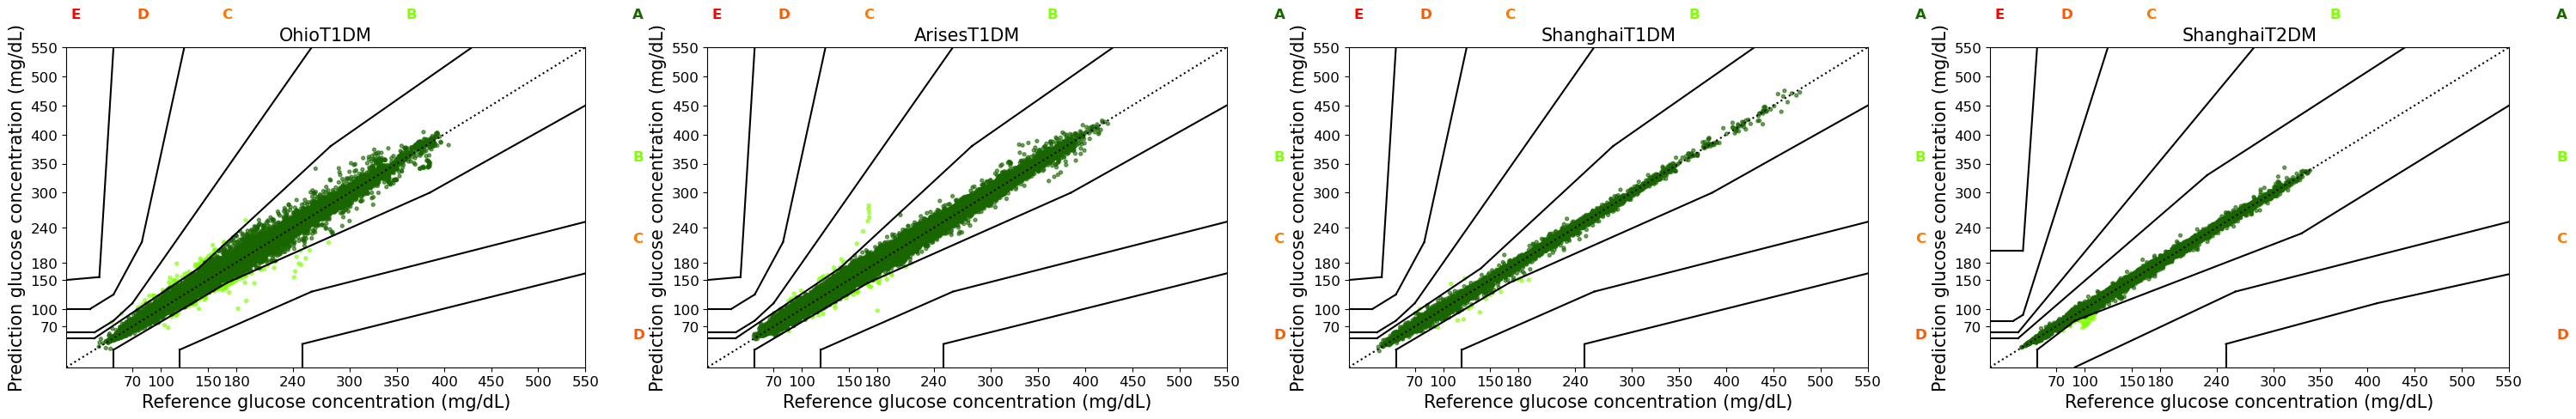

In [16]:
import matplotlib.pyplot as plt
# idxs = [[0,0], [0,1], [1,0], [1,1]]
# fig, axs = plt.subplots(figsize = (30, 20), ncols=2, nrows=2)


fig, axs = plt.subplots(figsize = (30, 5), ncols=4, nrows=1)

method = 'gatv2_exp_layer_1'

eg = 'parkes'

for i, dataset in enumerate(datasets):
    fontsize = 20
    # ax = axs[idxs[i][0], idxs[i][1]]
    ax = axs[i]
    if eg == 'clarke':
        clarke(reference = dataset_method_pid_seed2predictions[(dataset, 'GroundTruth')], test= dataset_method_pid_seed2predictions[(dataset, method)], units='mg/dl', ax=ax)
    else:
        t = 2 if 't2dm' in dataset else 1
        parkes(type=t, reference = dataset_method_pid_seed2predictions[(dataset, 'GroundTruth')], test= dataset_method_pid_seed2predictions[(dataset, method)], units='mg/dl', ax=ax)
    fontsize = 15
    ax.tick_params(axis='both', which='major', labelsize=fontsize-3)
    # graph labels
    ax.set_ylabel('Prediction glucose concentration (mg/dL)', fontsize=fontsize)
    ax.set_xlabel('Reference glucose concentration (mg/dL)', fontsize=fontsize)
    ax.set_title(dataset2name[dataset], fontsize=fontsize)
    
plt.tight_layout()
plt.savefig(f'./results/{eg}_{method}.pdf')